In [1]:
import sys
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install rebound

     |████████████████████████████████| 76 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 243 kB 24.0 MB/s eta 0:00:01
  Created wheel for rebound: filename=rebound-3.18.1-cp37-cp37m-linux_x86_64.whl size=579755 sha256=d3f7b455c0d1181adabb399bc760af24e0ed40b1f574a086959895890ad85a21
  Stored in directory: /home/jovyan/.cache/pip/wheels/2b/84/1e/7a046ad848432ec306b56c031799c86fdc5d6d385045f7020a
Successfully built rebound


In [54]:
import numpy as np
import rebound as rb
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=18)

Problem 1c

In [55]:
sim = rb.Simulation()
sim.units = ('yr','AU','Msun')
G = sim.G

In [56]:
#adding central mass and defining circular velocity like in class
Mcent = 1.0 
sim.add(m=Mcent)

r = 1.0 # AU
vcirc = np.sqrt(G*Mcent/r)

#adding test particle
sim.add(x=r,y=0,z=0,vx=0,vy=vcirc,vz=0)

In [57]:
#defining integration parameters as discussed in class
totaltime = 3.0 # years
timestep = 0.005# years
ntimes = int(totaltime/timestep + 1)
times = np.linspace(0,totaltime,ntimes)

In [58]:
# make arrays to hold the outputs
x = np.zeros(ntimes)
y = np.zeros(ntimes)
vx = np.zeros(ntimes)
vy = np.zeros(ntimes)

In [59]:
for j, time in enumerate(times):
    sim.integrate(time)
    # grabbing only the test particle as the central mass doesnt move
    x[j] = sim.particles[1].x
    y[j] = sim.particles[1].y
    vx[j] = sim.particles[1].vx
    vy[j] = sim.particles[1].vy

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


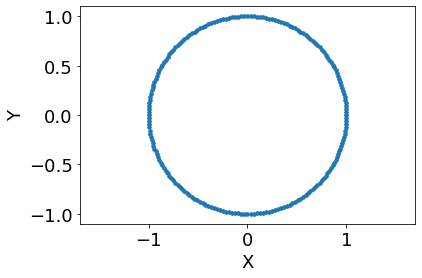

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


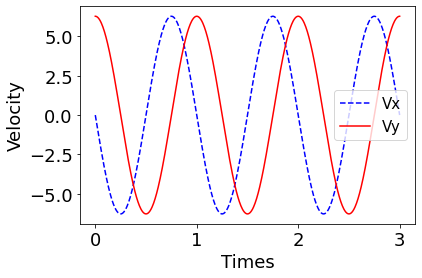

In [60]:
# plot

plt.plot(x,y,'.')
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.plot(times, vx, 'b--', label='Vx')
plt.plot(times, vy, 'r-', label='Vy')
plt.xlabel("Times")
plt.ylabel("Velocity")
plt.legend(fontsize=15)
plt.show()

Problem 1d

In [61]:
# initial velocities between 0 and vcirc
vinit = np.linspace(vcirc*0.9, 0.1, 4)

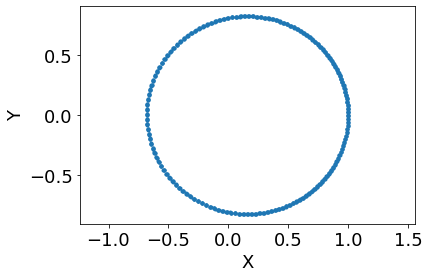

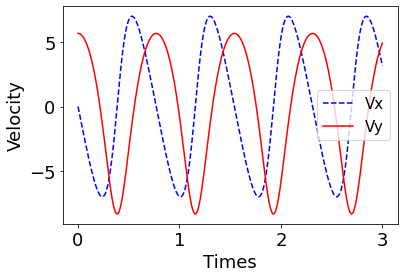

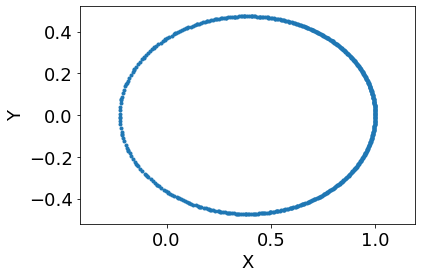

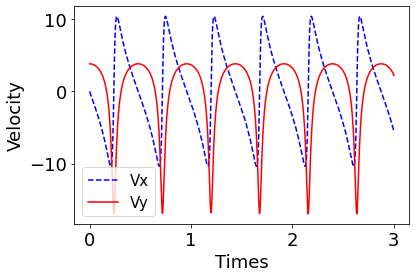

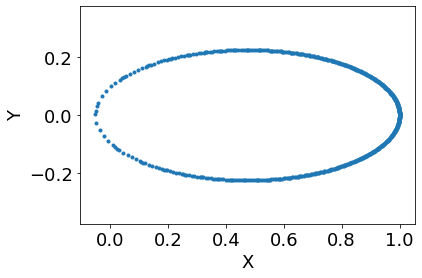

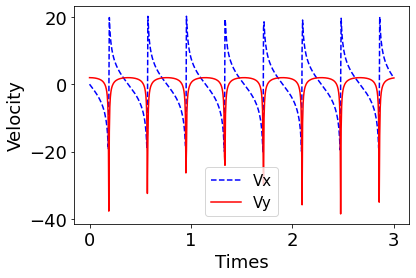

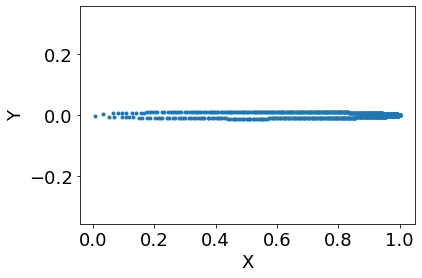

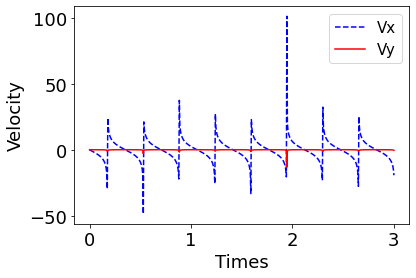

In [62]:
# Same as before but looping over the different v_init

for i in range(len(vinit)):
    sim = rb.Simulation()
    sim.units = ('yr','AU','Msun')
    sim.add(m=Mcent)
    sim.add(x=r,y=0,z=0,vx=0,vy=vinit[i],vz=0)
    
    
    for j, time in enumerate(times):
        sim.integrate(time)
        x[j] = sim.particles[1].x
        y[j] = sim.particles[1].y
        vx[j] = sim.particles[1].vx
        vy[j] = sim.particles[1].vy
     
    # plot
    plt.plot(x,y,'.')
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    plt.plot(times, vx, 'b--', label='Vx')
    plt.plot(times, vy, 'r-', label='Vy')
    plt.xlabel("Times")
    plt.ylabel("Velocity")
    plt.legend(fontsize=15)
    plt.show()

In [63]:
# the free-fall time from the homework/
tff = np.pi/np.sqrt(8.)/np.sqrt(G*Mcent/r**3)
print(tff)

0.17678003400527856


Problem 1f

In [64]:
# initial velocities between vcirc and vesc
vesc = np.sqrt(2.0*G*Mcent/r)
vinit = np.linspace(vcirc*1.1, vesc, 4)

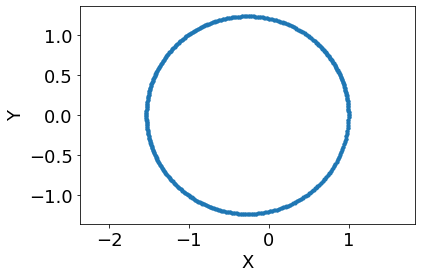

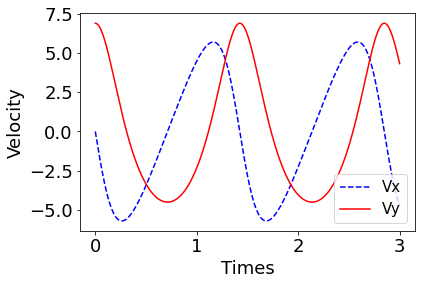

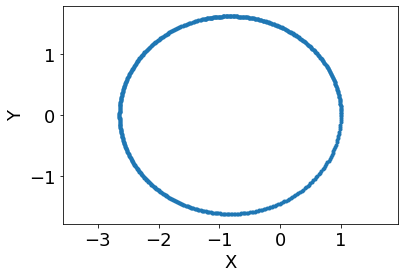

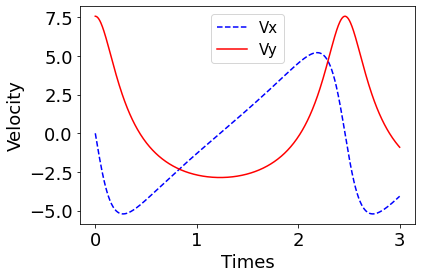

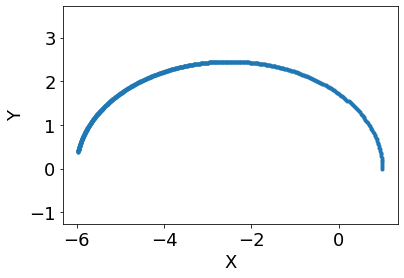

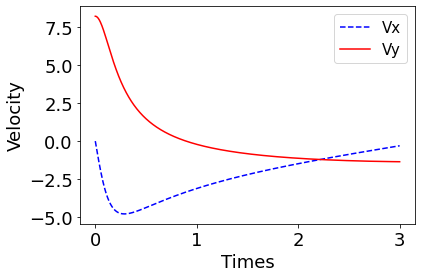

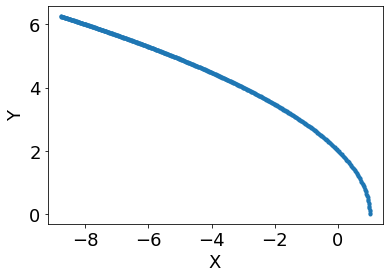

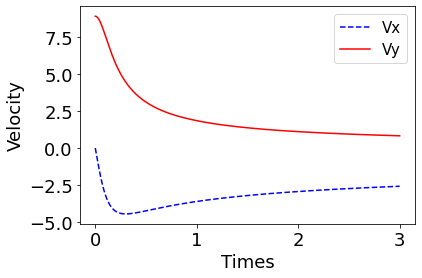

In [65]:
for i in range(len(vinit)):
    
    sim = rb.Simulation()
    sim.units = ('yr','AU','Msun')
    sim.add(m=Mcent)
    sim.add(x=r,y=0,z=0,vx=0,vy=vinit[i],vz=0)
    
   
    for j, time in enumerate(times):
        sim.integrate(time)
        
        x[j] = sim.particles[1].x
        y[j] = sim.particles[1].y
        vx[j] = sim.particles[1].vx
        vy[j] = sim.particles[1].vy
     
    # plot
    plt.plot(x,y,'.')
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    plt.plot(times, vx, 'b--', label='Vx')
    plt.plot(times, vy, 'r-', label='Vy')
    plt.xlabel("Times")
    plt.ylabel("Velocity")
    plt.legend(fontsize=15)
    plt.show()